## 287 - Parsing Weather Prediction Center Surface Bulletins

[Youtube](https://www.youtube.com/watch?v=6t6TPcfDEbY)

In [1]:
import matplotlib.pyplot as plt
import urllib.request

from metpy.io import parse_wpc_surface_bulletin
from io import BytesIO

In [2]:
url = 'https://www.wpc.ncep.noaa.gov/discussions/codsus'

In [3]:
with urllib.request.urlopen(url) as response:
    content = response.read()

In [4]:
content

b' \nCODED SURFACE FRONTAL POSITIONS\nNWS WEATHER PREDICTION CENTER COLLEGE PARK MD\n619 PM EDT MON JUN 05 2023\n \nVALID 060521Z\nHIGHS 1013 3576 1013 3192 1014 3481 1013 3384 1013 2996 1014 32102 1019 37104 \n1018 40101 1017 4298 1018 44110 1017 4282 1017 4288 1033 5884 1029 5730 1026 \n5842 1026 6536 1023 7366 1027 6068 1025 7091 1029 72127 1022 68150 1018 63146 \n1032 47135 1016 45115 \nLOWS 1001 22103 1011 3491 1011 3682 1010 3097 1003 40121 1000 35115 1006 \n37111 1011 45108 1015 45100 1015 4383 997 4364 1009 4772 1019 5956 1013 5362 \n1016 5557 1019 7058 1011 4678 1019 6775 1011 55112 1014 60115 1015 59108 1010 \n51112 1011 52116 1012 48118 1012 61134 1012 61124 1020 68109 1008 42124 1016 \n4596 \nTROF 1791 1990 2089 2387 \nTROF 1586 1784 1982 \nTROF 35115 33116 31115 29114 28112 26111 24110 22109 \nCOLD WK 3070 2972 2874 2776 2678 2679 \nTROF 1897 1998 20100 21101 22103 24104 25105 26106 28107 \nTROF 32103 31105 32108 33109 36110 \nTROF 3682 3684 3586 3488 3489 3491 \nTROF 3682

In [5]:
df = parse_wpc_surface_bulletin(BytesIO(content))

In [6]:
df

,valid,feature,strength,geometry
0,2023-06-05 21:00:00,HIGH,1013,POINT (-76 35)
1,2023-06-05 21:00:00,HIGH,1013,POINT (-92 31)
2,2023-06-05 21:00:00,HIGH,1014,POINT (-81 34)
3,2023-06-05 21:00:00,HIGH,1013,POINT (-84 33)
4,2023-06-05 21:00:00,HIGH,1013,POINT (-96 29)
...,...,...,...,...
134,2023-06-05 21:00:00,TROF,NaN,"LINESTRING (-121 40, -120 38, -119 36)"
135,2023-06-05 21:00:00,TROF,NaN,"LINESTRING (-117 39, -116 37, -115 35)"
136,2023-06-05 21:00:00,TROF,NaN,"LINESTRING (-115 35, -112 33, -111 31)"
137,2023-06-05 21:00:00,TROF,NaN,"LINESTRING (-108 45, -108 43, -110 40, -113 39)"


In [7]:
df['feature'].unique()

array(['HIGH', 'LOW', 'TROF', 'COLD', 'OCFNT', 'WARM', 'STNRY'],
      dtype=object)

In [8]:
df['feature'].value_counts()

feature
TROF     55
LOW      29
HIGH     24
STNRY    14
COLD     10
WARM      4
OCFNT     3
Name: count, dtype: int64

Text(0.5, 1.0, 'Current Low and High Strengths')

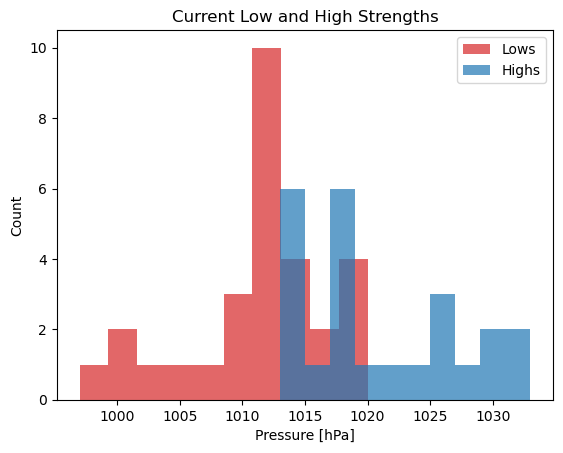

In [10]:
fig, ax = plt.subplots()
low_strength = df[df['feature']=='LOW'].strength
high_strength = df[df['feature']=='HIGH'].strength
ax.hist(low_strength, color='tab:red', alpha=0.7, label='Lows')
ax.hist(high_strength, color='tab:blue', alpha=0.7, label='Highs')
ax.legend()
ax.set_xlabel('Pressure [hPa]')
ax.set_ylabel('Count')
plt.title('Current Low and High Strengths')